In [1]:
# importing liabraries for analysis
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# setting pandas safe option
pd.set_option('mode.copy_on_write', True)


In [37]:
# importing Community Sauna Dataset

sauna_2025 = pd.read_csv('/Users/rachael/Documents/LIS/Capstone/Research and ethics/Copy of Anonymised Community Sauna Annual 2024 Survey (Responses).csv')
sauna_2025.head()

,Timestamp,What is your age group?,What gender do you identify with?,How would you describe your ethnicity?,Do you consider yourself to have a disability or long term health condition?,What is your sexual orientation?,Please indicate the following about your employment status:,What is your religious belief?,Where do you currently live?,Had you been to a sauna before you came to Community Sauna?,...,"Are the sauna prices reasonable and in line with your expectations?\n\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",Please share why community sauna is important to you?,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply),Is there anything else you would like to share or comment on regarding your experiences at the community sauna in London?
0,45688.689685,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Heterosexual,Employed,Judaism,Central London,Once or twice,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work",NaN
1,45688.689979,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Heterosexual,Employed,Atheism,South East London,Once or twice,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN,NaN
2,45688.690375,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Heterosexual,Employed,Agnosticism,South East London,I was already a regular sauna user,...,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events",NaN
3,45688.690694,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Homosexual,Employed,Atheism,East London,Once or twice,...,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro...",NaN
4,45688.691168,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Heterosexual,Employed,Judaism,North West London,Once or twice,...,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events",It’s absolutely brilliant- please come to Kent...


In [3]:
sauna_2025.info

<bound method DataFrame.info of          Timestamp What is your age group?  What gender do you identify with?  \
0     45688.689685                    25–34                            Female   
1     45688.689979                    18–24                              Male   
2     45688.690375                    35–44                              Male   
3     45688.690694                    25–34                        Non-binary   
4     45688.691168                    45–54                            Female   
...            ...                      ...                               ...   
1794  45720.380779                    25–34                            Female   
1795  45720.450203                    25–34                            Female   
1796  45720.463383                    25–34                            Female   
1797  45720.918005                    25–34                            Female   
1798  45721.428420                    25–34                        Non-binary

In [38]:
# checking for missing values
sauna_2025.isnull().sum()

Timestamp                                                                                                                                    0
What is your age group?                                                                                                                      1
What gender do you identify with?                                                                                                            6
How would you describe your ethnicity?                                                                                                       5
Do you consider yourself to have a disability or long term health condition?                                                                11
What is your sexual orientation?                                                                                                             4
Please indicate the following about your employment status:                                                                                  3

In [39]:
# dropping columns for anonymity and irrelevance to analysis
sauna_2025 = sauna_2025.drop(columns=['ID', 'What is your name?', 'What is your sexual orientation?',
                                        'Overall, how satisfied are you with your life nowadays? (where 0 is “not at all” and 10 is “completely”)',
                                        'Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)', 
                                        'I’ve been feeling optimistic about the future',
                                        'I’ve been feeling useful', 'I’ve been feeling relaxed',
                                        'I’ve been dealing with problems well', 'I’ve been thinking clearly',
                                        'I’ve been feeling close to other people',
                                        'I’ve been able to make up my own mind about things'], 
                                        errors='ignore')
sauna_2025.head()

,Timestamp,What is your age group?,What gender do you identify with?,How would you describe your ethnicity?,Do you consider yourself to have a disability or long term health condition?,Please indicate the following about your employment status:,What is your religious belief?,Where do you currently live?,Had you been to a sauna before you came to Community Sauna?,How did you hear about the Community Sauna?,...,"Are the sauna prices reasonable and in line with your expectations?\n\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",Please share why community sauna is important to you?,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply),Is there anything else you would like to share or comment on regarding your experiences at the community sauna in London?
0,45688.689685,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work",NaN
1,45688.689979,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN,NaN
2,45688.690375,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,...,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events",NaN
3,45688.690694,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,...,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro...",NaN
4,45688.691168,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,...,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events",It’s absolutely brilliant- please come to Kent...


In [43]:
# renaming columns for quick reference
sauna_2025 = sauna_2025.rename(columns={
    'What is your age group?': 'Age',
    'What gender do you identify with?': 'Gender',
    'How would you describe your ethnicity?': 'Ethnicity',
    'Do you consider yourself to have a disability or long term health condition?': 'Disability or health condition declared',
    'Please indicate the following about your employment status:': 'Employment status',
    'Where do you currently live?': 'Location',
    ' How often do you visit our sauna(s)?': 'Frequency of sauna visits',
    'Which of our sauna locations do you visit most often?': 'Most visited sauna',
    'Have you experienced any physical health improvements from using the sauna?': 'Physical health improvements',
    'Have you experienced any mental health improvements from using the sauna?': 'Mental health improvements',
    'How important is having regular access to sauna? (On a scale of 1 to 5, where 1 is low and 5 is high)': 'Importance of sauna access',
    'What do you enjoy most about the community sauna?': 'Enjoyment reasons',
    'Do you feel a sense of belonging or community when using the sauna? On a scale of 1 to 5, where 1 is low and 5 is high': 'Sense of belonging'
})

In [44]:
sauna_2025.head()

,Timestamp,What is your age group?,Gender,Ethnicity,Disability or health condition declared,Employment status,What is your religious belief?,Where do you currently live?,Had you been to a sauna before you came to Community Sauna?,How did you hear about the Community Sauna?,...,"Are the sauna prices reasonable and in line with your expectations?\n\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",Please share why community sauna is important to you?,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply),Is there anything else you would like to share or comment on regarding your experiences at the community sauna in London?
0,45688.689685,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work",NaN
1,45688.689979,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN,NaN
2,45688.690375,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,...,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events",NaN
3,45688.690694,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,...,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro...",NaN
4,45688.691168,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,...,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events",It’s absolutely brilliant- please come to Kent...


In [45]:
# importing the one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# creating encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

sauna_2025_subset = sauna_2025

# .loc[:,[
#     'How often do you visit our sauna?', 
#     'Have you experienced any mental health improvements from using the sauna?',
#     'Have you experienced any physical health improvements from using the sauna?'
#     ]]

# running encoder on subset
# encoder.fit_transform(sauna_2025_subset['How often do you visit our sauna?'])
sauna_2025_subset

,Timestamp,What is your age group?,Gender,Ethnicity,Disability or health condition declared,Employment status,What is your religious belief?,Where do you currently live?,Had you been to a sauna before you came to Community Sauna?,How did you hear about the Community Sauna?,...,"Are the sauna prices reasonable and in line with your expectations?\n\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",Please share why community sauna is important to you?,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply),Is there anything else you would like to share or comment on regarding your experiences at the community sauna in London?
0,45688.689685,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work",NaN
1,45688.689979,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN,NaN
2,45688.690375,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,...,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events",NaN
3,45688.690694,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,...,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro...",NaN
4,45688.691168,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,...,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events",It’s absolutely brilliant- please come to Kent...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,45720.380779,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Spiritual but not Religious,East London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,No,NaN,It is a great social activity to do as a group...,South East London,NaN,NaN
1795,45720.450203,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South West London,Once or twice,Friend took me,...,5.0,"There wasn’t a light in the changing room, pho...",Unsure of a specific location but some (in/clo...,Changing room lighting,No,NaN,I felt great after the session and would like ...,South West London,"Sauna health benefits, Sauna etiquette or best...","More locations if possible, they are often boo..."
1796,45720.463383,25–34,Female,"Mixed or multiple ethnic groups (e.g., White a...",No,Self employed,Agnosticism,West London,I was already a regular sauna user,Word of mouth,...,5.0,Offering some sort of salt scrub to pair well ...,NaN,More advertising for events,No,NaN,It feels like you’re distancing yourself from ...,North West London,"Behind the scenes, Sauna etiquette or best pra...",Thank you for your beautiful sauna.
1797,45720.918005,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,East London,Once or twice,Word of mouth,...,5.0,NaN,NaN,NaN,No,Social Media,"Improved mental health, makes me feel strong a...",NaN,Sauna etiquette or best practices,NaN


In [5]:
# cross-tabulating the data to see the relationship
contingency_physical_25 = pd.crosstab(sauna_2025['How often do you visit our sauna?'], sauna_2025['Have you experienced any physical health improvements from using the sauna?'])
contingency_mental_25 = pd.crosstab(sauna_2025['How often do you visit our sauna?'], sauna_2025['Have you experienced any mental health improvements from using the sauna?'])

KeyError: 'Have you experienced any physical health improvements from using the sauna?'

In [ ]:
# importing Microsoft Forms survey data

sauna_group = pd.read_csv('/Users/rachael/Code/Capstone/Microsoft Form Responses.csv')
sauna_group.head()


,ID,What is your name?,What is your age group?,What gender do you identify with?,How would you describe your ethnicity?,Do you consider yourself to have a disability or long term health condition?,What is your sexual orientation?,Please indicate the following about your employment status:,Where do you currently live?,How often do you visit our sauna(s)?,...,Please share why community sauna is important to you?,"Overall, how satisfied are you with your life nowadays? (where 0 is “not at all” and 10 is “completely”)","Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)\n",I’ve been feeling optimistic about the future,I’ve been feeling useful,I’ve been feeling relaxed,I’ve been dealing with problems well,I’ve been thinking clearly,I’ve been feeling close to other people,I’ve been able to make up my own mind about things
0,2,Talitha Wachtelborn,35-44,Female,White: Other White,No,Heterosexual,Employed,East London,Monthly,...,I really like scheduling this in with my frien...,8,8,(4) Often,(4) Often,(3) Some of the time,(4) Often,(4) Often,(3) Some of the time,(4) Often
1,3,Mohammed Sharif Ullah,25-34,Male,"Asian, Asian British or Asian Welsh: Bangladeshi",No,Heterosexual,Unemployed,East London,Monthly,...,"Because, it's a positive good vibe place every...",10,8,(5) All of the time,(3) Some of the time,(4) Often,(3) Some of the time,(5) All of the time,(4) Often,(5) All of the time
2,5,Daniel Ehrlich,25-34,Male,White: Other White,No,Bisexual/Pansexual,Employed,East London,Weekly,...,It is nice to have a no frills space where you...,7,8,(2) Rarely,(4) Often,(2) Rarely,(3) Some of the time,(4) Often,(4) Often,(4) Often
3,6,Anna Li,45-54,Female,"Asian, Asian British or Asian Welsh: Chinese",Prefer not to say,Prefer not to say,Unemployed,East London,Quarterly,...,Accessibility to sauna. Somatic release.,6,6,(3) Some of the time,(3) Some of the time,(3) Some of the time,(3) Some of the time,(3) Some of the time,(4) Often,(3) Some of the time
4,7,Anthony Edey,45-54,Male,"Black, Black British, Black Welsh, Caribbean o...",No,Heterosexual,Employed,East London,Weekly,...,"Frequent visits, the amiable staff, and eventu...",8,8,(4) Often,(4) Often,(2) Rarely,(3) Some of the time,(4) Often,(2) Rarely,(4) Often


In [ ]:
sauna_group.columns

Index(['ID', 'What is your name?', 'What is your age group?',
       'What gender do you identify with?',
       'How would you describe your ethnicity?',
       'Do you consider yourself to have a disability or long term health condition?',
       'What is your sexual orientation?',
       'Please indicate the following about your employment status:',
       'Where do you currently live?', 'How often do you visit our sauna(s)?',
       'Which of our sauna locations do you visit most often?',
       'Have you experienced any physical health improvements from using the sauna?',
       'Have you experienced any mental health improvements from using the sauna?',
       'How important is having regular access to sauna? (On a scale of 1 to 5, where 1 is low and 5 is high)',
       'What do you enjoy most about the community sauna?',
       'Do you feel a sense of belonging or community when using the sauna? On a scale of 1 to 5, where 1 is low and 5 is high',
       'Please share why commun

In [ ]:
# dropping columns for anonymity and irrelevance to analysis
sauna_group = sauna_group.drop(columns=['ID', 'What is your name?', 'What is your sexual orientation?',
                                        'Overall, how satisfied are you with your life nowadays? (where 0 is “not at all” and 10 is “completely”)',
                                        'Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)', 
                                        'I’ve been feeling optimistic about the future',
                                        'I’ve been feeling useful', 'I’ve been feeling relaxed',
                                        'I’ve been dealing with problems well', 'I’ve been thinking clearly',
                                        'I’ve been feeling close to other people',
                                        'I’ve been able to make up my own mind about things'], 
                                        errors='ignore')
sauna_group.head()

,What is your age group?,What gender do you identify with?,How would you describe your ethnicity?,Do you consider yourself to have a disability or long term health condition?,Please indicate the following about your employment status:,Where do you currently live?,How often do you visit our sauna(s)?,Which of our sauna locations do you visit most often?,Have you experienced any physical health improvements from using the sauna?,Have you experienced any mental health improvements from using the sauna?,"How important is having regular access to sauna? (On a scale of 1 to 5, where 1 is low and 5 is high)",What do you enjoy most about the community sauna?,"Do you feel a sense of belonging or community when using the sauna? On a scale of 1 to 5, where 1 is low and 5 is high",Please share why community sauna is important to you?,"Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)\n"
0,35-44,Female,White: Other White,No,Employed,East London,Monthly,Stratford,No,Yes,5,Improved my mood;Helped with physical pain man...,3,I really like scheduling this in with my frien...,8
1,25-34,Male,"Asian, Asian British or Asian Welsh: Bangladeshi",No,Unemployed,East London,Monthly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;Increased ...,3,"Because, it's a positive good vibe place every...",8
2,25-34,Male,White: Other White,No,Employed,East London,Weekly,Hackney Wick,Not sure,Yes,4,Improved my mood;,4,It is nice to have a no frills space where you...,8
3,45-54,Female,"Asian, Asian British or Asian Welsh: Chinese",Prefer not to say,Unemployed,East London,Quarterly,Hackney Wick,Yes,Yes,5,Improved my mood;Assists me with my mental hea...,3,Accessibility to sauna. Somatic release.,6
4,45-54,Male,"Black, Black British, Black Welsh, Caribbean o...",No,Employed,East London,Weekly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;I made new...,4,"Frequent visits, the amiable staff, and eventu...",8


In [ ]:
# renaming columns for quick reference
sauna_group = sauna_group.rename(columns={
    'What is your age group?': 'Age',
    'What gender do you identify with?': 'Gender',
    'How would you describe your ethnicity?': 'Ethnicity',
    'Do you consider yourself to have a disability or long term health condition?': 'Disability or health condition declared',
    'Please indicate the following about your employment status:': 'Employment status',
    'Where do you currently live?': 'Location',
    'How often do you visit our sauna(s)?': 'Frequency of sauna visits',
    'Which of our sauna locations do you visit most often?': 'Most visited sauna',
    'Have you experienced any physical health improvements from using the sauna?': 'Physical health improvements',
    'Have you experienced any mental health improvements from using the sauna?': 'Mental health improvements',
    'How important is having regular access to sauna? (On a scale of 1 to 5, where 1 is low and 5 is high)': 'Importance of sauna access',
    'What do you enjoy most about the community sauna?': 'Enjoyment reasons',
    'Do you feel a sense of belonging or community when using the sauna? On a scale of 1 to 5, where 1 is low and 5 is high': 'Sense of belonging'
})

In [ ]:
sauna_group

,Age,Gender,Ethnicity,Disability or health condition declared,Employment status,Location,Frequency of sauna visits,Most visited sauna,Physical health improvements,Mental health improvements,Importance of sauna access,Enjoyment reasons,Sense of belonging,Please share why community sauna is important to you?,"Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)\n"
0,35-44,Female,White: Other White,No,Employed,East London,Monthly,Stratford,No,Yes,5,Improved my mood;Helped with physical pain man...,3,I really like scheduling this in with my frien...,8
1,25-34,Male,"Asian, Asian British or Asian Welsh: Bangladeshi",No,Unemployed,East London,Monthly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;Increased ...,3,"Because, it's a positive good vibe place every...",8
2,25-34,Male,White: Other White,No,Employed,East London,Weekly,Hackney Wick,Not sure,Yes,4,Improved my mood;,4,It is nice to have a no frills space where you...,8
3,45-54,Female,"Asian, Asian British or Asian Welsh: Chinese",Prefer not to say,Unemployed,East London,Quarterly,Hackney Wick,Yes,Yes,5,Improved my mood;Assists me with my mental hea...,3,Accessibility to sauna. Somatic release.,6
4,45-54,Male,"Black, Black British, Black Welsh, Caribbean o...",No,Employed,East London,Weekly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;I made new...,4,"Frequent visits, the amiable staff, and eventu...",8
5,45-54,Female,"White: English, Welsh, Scottish, Northern Iris...",No,Employed,East London,Monthly,Hackney Wick,Not sure,Yes,4,Improved my mood;Improved sense of belonging t...,4,It's a little haven where there are fires and ...,9
6,25-34,Female,"White: English, Welsh, Scottish, Northern Iris...",No,Employed,East London,Monthly,Hackney Wick,Not sure,Yes,4,Improved my mood;Improved sense of belonging t...,3,I think a lot about the idea of rituals as a w...,7
7,25-34,Female,Mixed or Multiple ethnic groups: White and Asian,No,Self-employed,East London,Monthly,Hackney Wick,Not sure,Yes,3,Improved my mood;,5,improved wellbeing,6
8,25-34,Non-binary,White: Irish,No,Employed,East London,Monthly,Stratford,Not sure,Yes,4,Improved my mood;Improved sense of belonging t...,3,coming together with like minds to prioritise ...,7
9,45-54,Male,Mixed or Multiple ethnic groups: White and Asian,No,Employed,East London,Monthly,Hackney Wick,No,Not sure,3,Improved my mood;Improved sense of belonging t...,4,It's nice to get hot and cold. Makes you feel ...,8


In [ ]:
sauna_group.loc[10]

Age                                                                                                                                                                                       25-34
Gender                                                                                                                                                                                  Female 
Ethnicity                                                                                                                                     White: English, Welsh, Scottish, Northern Iris...
Disability or health condition declared                                                                                                                                                     Yes
Employment status                                                                                                                                                                      Employed
Location                                

In [ ]:
# getting descriptive statistics for the sauna group data
sauna_group.describe()

,Importance of sauna access,Sense of belonging,"Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)\n"
count,15.000000,15.000000,15.000000
mean,4.066667,3.800000,7.600000
std,0.798809,0.676123,0.910259
min,3.000000,3.000000,6.000000
25%,3.500000,3.000000,7.000000
50%,4.000000,4.000000,8.000000
75%,5.000000,4.000000,8.000000
max,5.000000,5.000000,9.000000


In [ ]:
# generating counts for each column to understand the distribution of responses
gender_df = gender_counts = sauna_group['Gender'].value_counts().reset_index()
age_df = age_counts = sauna_group['Age'].value_counts().reset_index()
ethnicity_counts = sauna_group['Ethnicity'].value_counts()
disability_counts = sauna_group['Disability or health condition declared'].value_counts()
employment_counts = sauna_group['Employment status'].value_counts()
location_counts = sauna_group['Location'].value_counts()
frequency_counts = sauna_group['Frequency of sauna visits'].value_counts()
most_visited_counts = sauna_group['Most visited sauna'].value_counts()
physical_health_improv = sauna_group['Physical health improvements'].value_counts()
mental_health_improv = sauna_group['Mental health improvements'].value_counts()
access_importance_counts = sauna_group['Importance of sauna access'].value_counts()
belonging_counts = sauna_group['Sense of belonging'].value_counts()

<Axes: xlabel='Age', ylabel='count'>

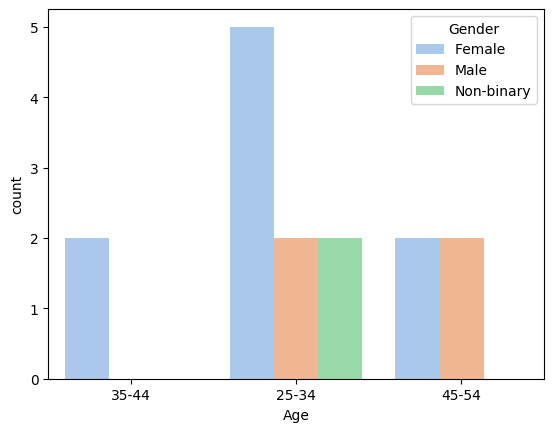

In [ ]:
# visualing respondents by age group
sns.countplot(sauna_group, x="Age", hue="Gender", palette="pastel")

/var/folders/25/6q159t093n9_b3bm1nj1hnbm0000gp/T/ipykernel_10904/3359409660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sauna_group, x='Ethnicity', palette='pastel')


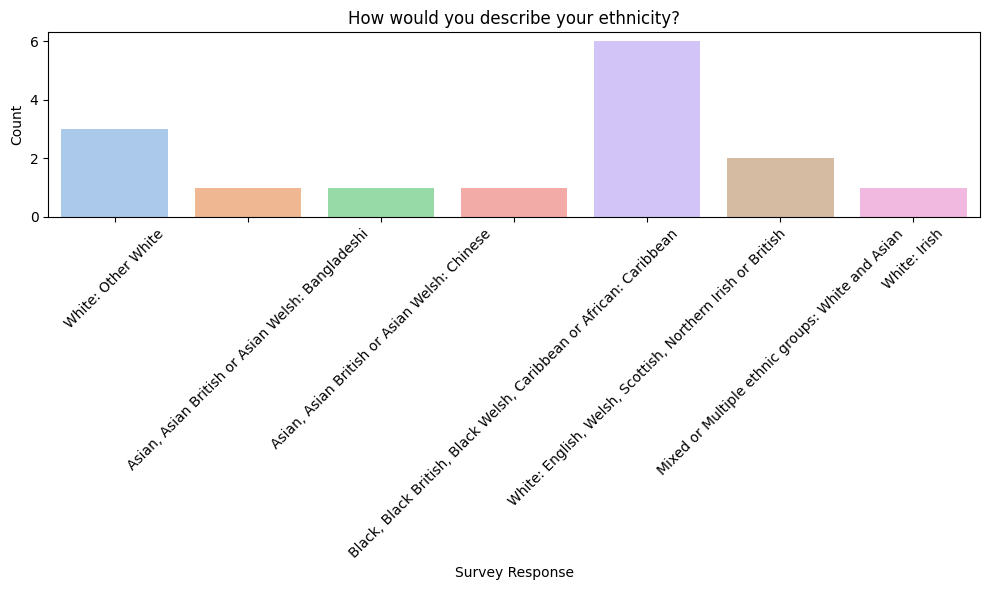

In [ ]:
# visualising by ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(data=sauna_group, x='Ethnicity', palette='pastel')
plt.title('How would you describe your ethnicity?')
plt.xlabel('Survey Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

/var/folders/25/6q159t093n9_b3bm1nj1hnbm0000gp/T/ipykernel_10904/2366272480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sauna_group, x='Disability or health condition declared', palette='pastel')


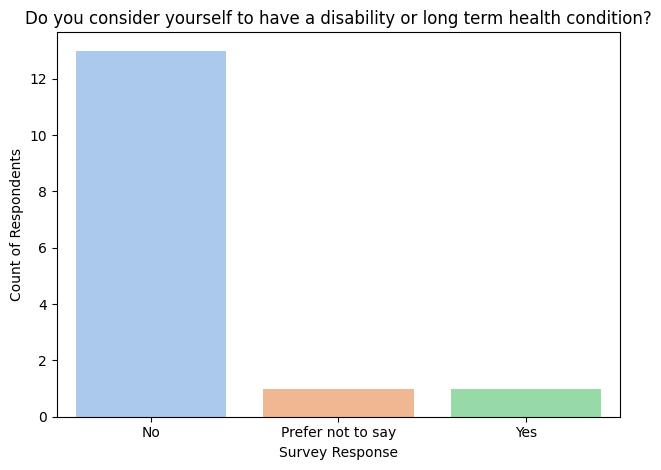

In [ ]:
# visualising by disability
sns.countplot(data=sauna_group, x='Disability or health condition declared', palette='pastel')
plt.title('Do you consider yourself to have a disability or long term health condition?')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

/var/folders/25/6q159t093n9_b3bm1nj1hnbm0000gp/T/ipykernel_10904/1232305598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sauna_group, x='Employment status', palette='pastel')


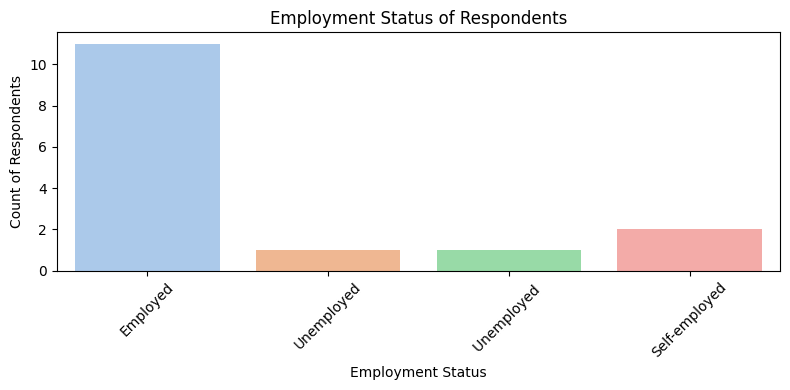

In [ ]:
# visualing respondents by employment status
plt.figure(figsize=(8, 4))
sns.countplot(data=sauna_group, x='Employment status', palette='pastel')
plt.title('Employment Status of Respondents')
plt.xlabel('Employment Status')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()

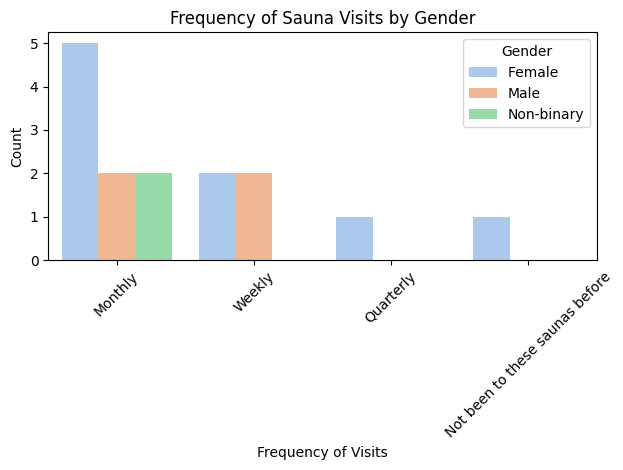

In [ ]:
sns.countplot(data=sauna_group, x="Frequency of sauna visits", hue="Gender", palette='pastel',)
plt.title('Frequency of Sauna Visits by Gender')
plt.xlabel('Frequency of Visits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

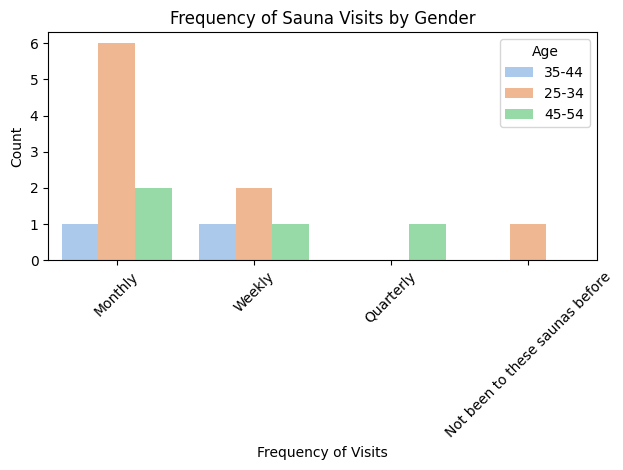

In [ ]:
sns.countplot(data=sauna_group, x="Frequency of sauna visits", hue="Age", palette='pastel',)
plt.title('Frequency of Sauna Visits by Gender')
plt.xlabel('Frequency of Visits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

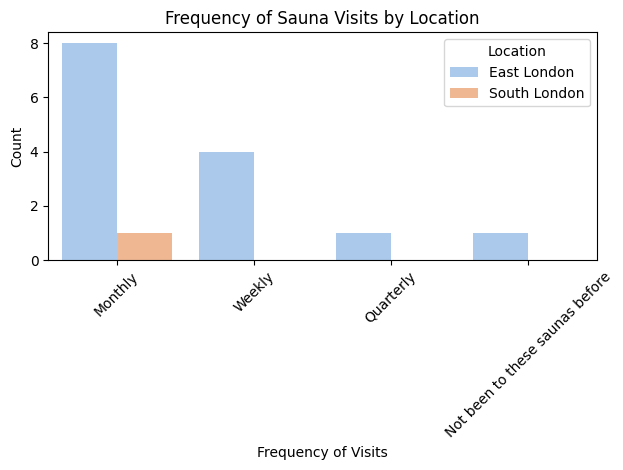

In [ ]:
sns.countplot(data=sauna_group, x="Frequency of sauna visits", hue="Location", palette='pastel',)
plt.title('Frequency of Sauna Visits by Location')
plt.xlabel('Frequency of Visits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

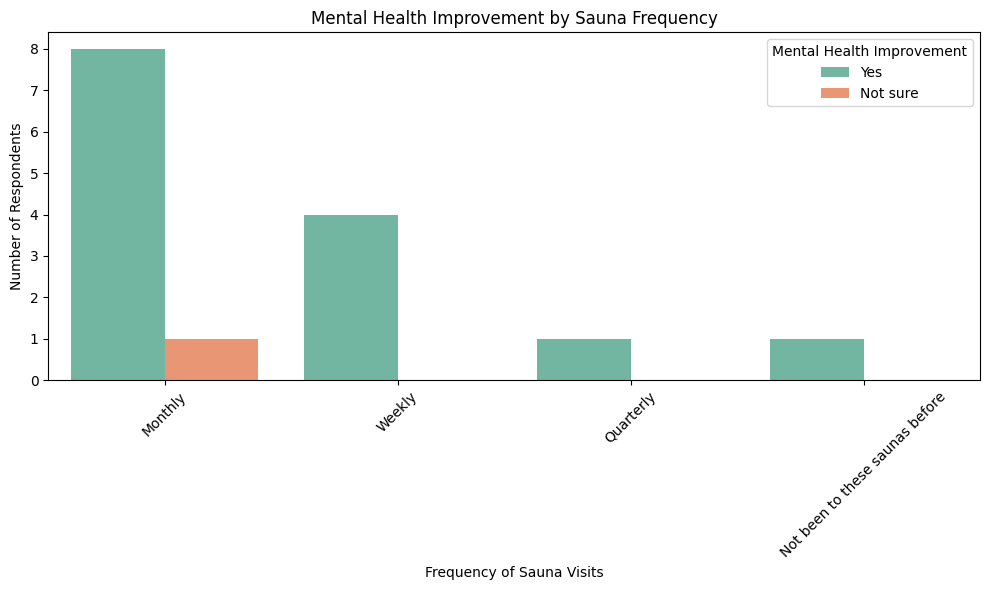

In [ ]:

# Rename columns for easier reference (optional)
sauna_group = sauna_group.rename(columns={
    'Frequency of sauna visits': 'sauna_frequency',
    'Mental health improvements': 'mental_health_improvement'
})

# Create a count plot (grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(
    data=sauna_group,
    x='sauna_frequency',
    hue='mental_health_improvement',
    palette='Set2'
)

plt.title('Mental Health Improvement by Sauna Frequency')
plt.xlabel('Frequency of Sauna Visits')
plt.ylabel('Number of Respondents')
plt.legend(title='Mental Health Improvement')
plt.xticks(rotation=45)
plt.tight_layout()


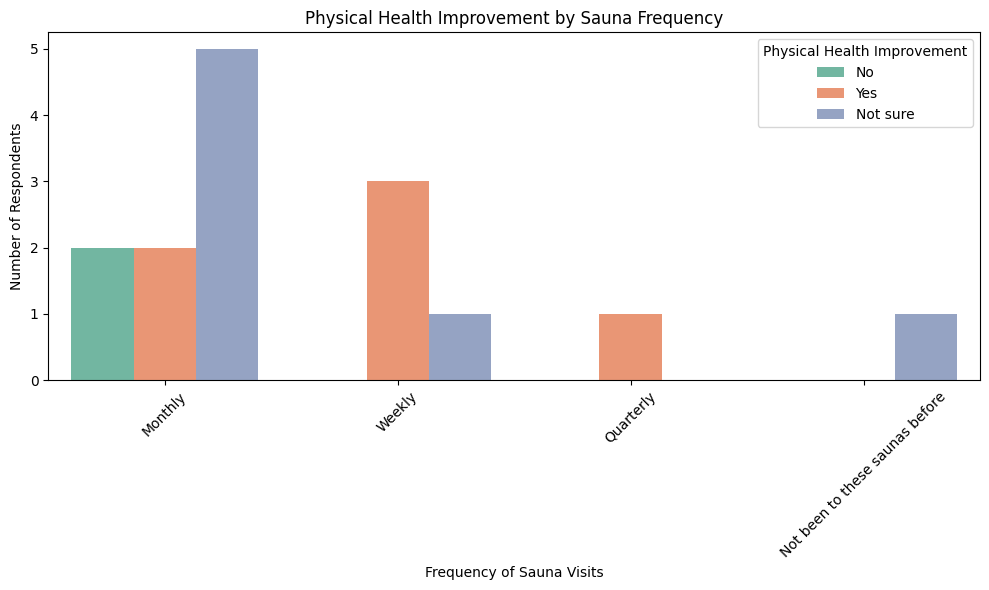

In [ ]:
sauna_group = sauna_group.rename(columns={
    'Frequency of sauna visits': 'sauna_frequency',
    'Physical health improvements': 'physical_health_improvement'
})

# Create a count plot (grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(
    data=sauna_group,
    x='sauna_frequency',
    hue='physical_health_improvement',
    palette='Set2'
)

plt.title('Physical Health Improvement by Sauna Frequency')
plt.xlabel('Frequency of Sauna Visits')
plt.ylabel('Number of Respondents')
plt.legend(title='Physical Health Improvement')
plt.xticks(rotation=45)
plt.tight_layout()


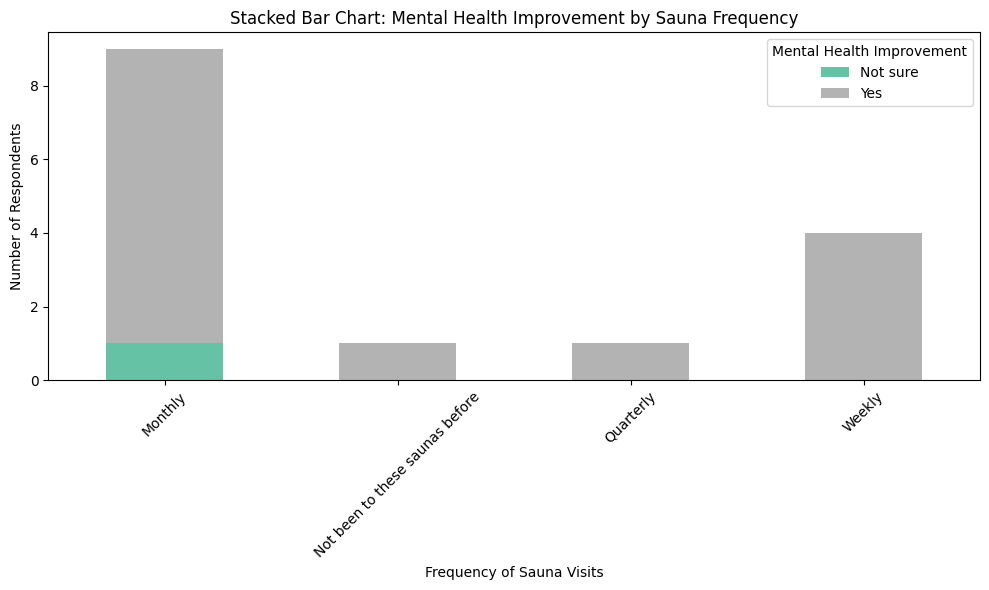

In [ ]:

# Rename for convenience (if not already done)
sauna_group = sauna_group.rename(columns={
    'Frequency of sauna visits': 'sauna_frequency',
    'Mental health improvements': 'mental_health_improvement'
})

# Create a contingency table
contingency = pd.crosstab(sauna_group['sauna_frequency'], sauna_group['mental_health_improvement'])

# Plot
contingency.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)

plt.title('Stacked Bar Chart: Mental Health Improvement by Sauna Frequency')
plt.xlabel('Frequency of Sauna Visits')
plt.ylabel('Number of Respondents')
plt.legend(title='Mental Health Improvement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


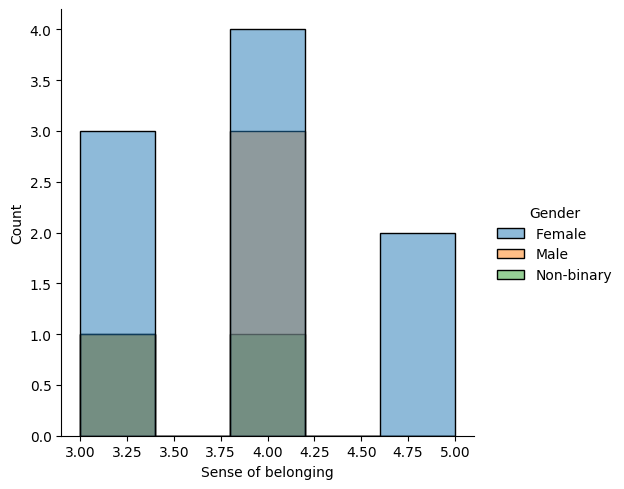

In [ ]:
sns.displot(data=sauna_group, x="Sense of belonging", hue="Gender")

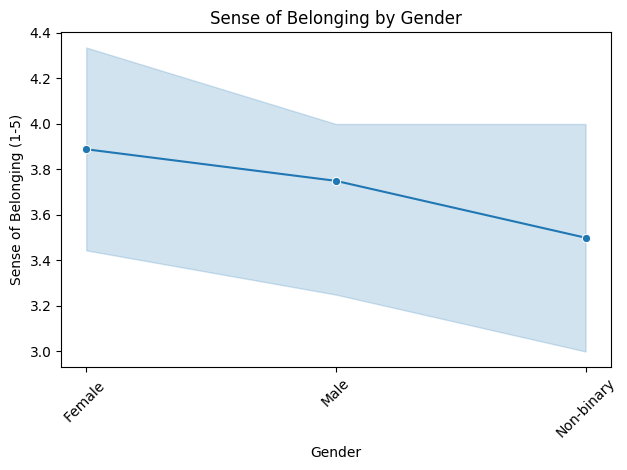

In [ ]:
# visualing sauna and belonging 
sns.lineplot(data=sauna_group, x='Gender', y='Sense of belonging', marker='o')
plt.title('Sense of Belonging by Gender')
plt.xlabel('Gender')
plt.ylabel('Sense of Belonging (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

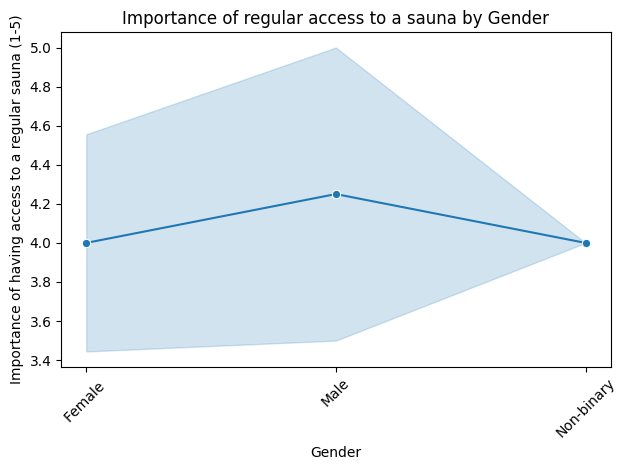

In [ ]:
# visualing sauna access by gender
sns.lineplot(data=sauna_group, x='Gender', y='Importance of sauna access', marker='o')
plt.title('Importance of regular access to a sauna by gender')
plt.xlabel('Gender')
plt.ylabel('Importance of having access to a regular sauna (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/25/6q159t093n9_b3bm1nj1hnbm0000gp/T/ipykernel_10904/2421609682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sauna_group, x='Physical health improvements', palette='pastel')


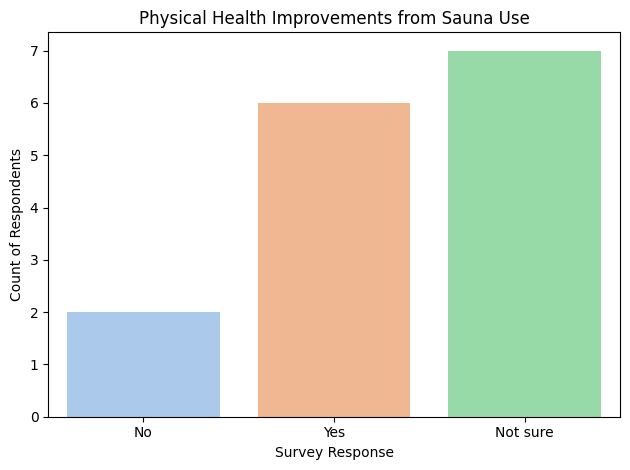

In [ ]:
# visualizing physical health improvements
sns.countplot(data=sauna_group, x='Physical health improvements', palette='pastel')
plt.title('Physical Health Improvements from Sauna Use')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

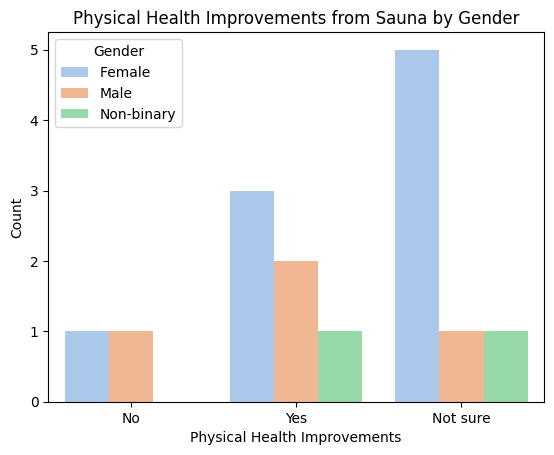

In [ ]:
# health improvements by gender
sns.countplot(data=sauna_group, x='Physical health improvements', hue='Gender', palette='pastel')
plt.title('Physical Health Improvements from Sauna by Gender')
plt.xlabel('Physical Health Improvements')
plt.ylabel('Count')
plt.show() 

/var/folders/25/6q159t093n9_b3bm1nj1hnbm0000gp/T/ipykernel_10904/331189795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sauna_group, x='Mental health improvements', palette='pastel')


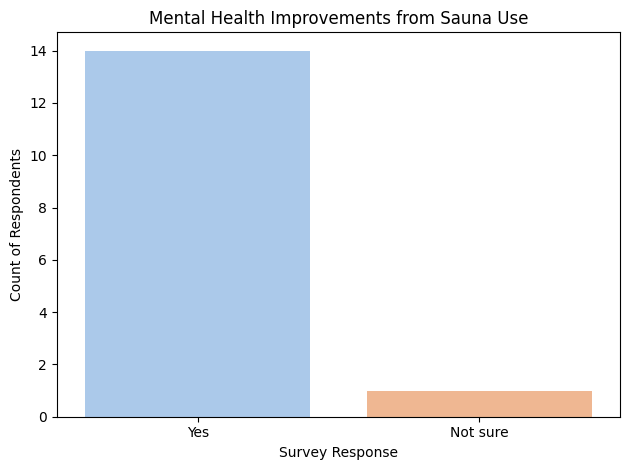

In [ ]:
# visualizing mental health improvements
sns.countplot(data=sauna_group, x='Mental health improvements', palette='pastel')
plt.title('Mental Health Improvements from Sauna Use')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

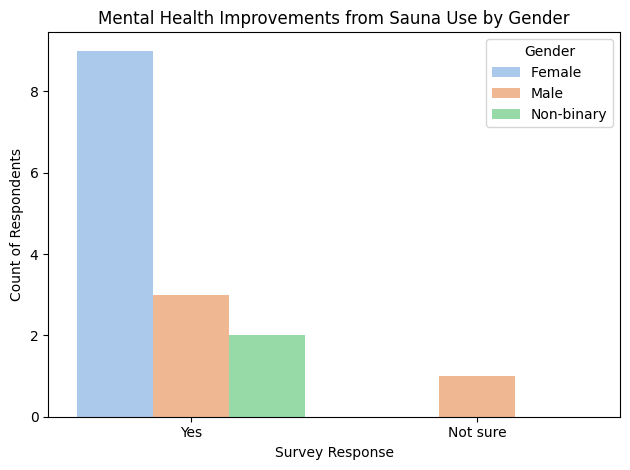

In [ ]:
# visualizing mental health improvements by Gender
sns.countplot(data=sauna_group, x='Mental health improvements', palette='pastel', hue='Gender')
plt.title('Mental Health Improvements from Sauna Use by Gender')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

In [ ]:
# Create contingency table
contingency_physical = pd.crosstab(sauna_group['Frequency of sauna visits'], sauna_group['Physical health improvements'])
contingency_mental = pd.crosstab(sauna_group['Frequency of sauna visits'], sauna_group['Mental health improvements'])

In [ ]:
contingency_physical

Physical health improvements,No,Not sure,Yes
Frequency of sauna visits,,,
Monthly,2,5,2
Not been to these saunas before,0,1,0
Quarterly,0,0,1
Weekly,0,1,3


In [ ]:
contingency_mental

Mental health improvements,Not sure,Yes
Frequency of sauna visits,,
Monthly,1,8
Not been to these saunas before,0,1
Quarterly,0,1
Weekly,0,4


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Performing Chi-square test of independence
# between frequency of sauna visits and physical health improvements
contingency = pd.crosstab(
    sauna_group['Frequency of sauna visits'],
    sauna_group['Physical health improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square statistic: 6.200396825396825
Degrees of freedom: 6
P-value: 0.40112020013259775


In [ ]:
# Performing Chi-square test of independence
# between mental health improvements chi-square test
contingency = pd.crosstab(
    sauna_group['Frequency of sauna visits'],
    sauna_group['Mental health improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

Chi-square statistic: 0.7142857142857143
Degrees of freedom: 3
P-value: 0.8698387717651156


In [ ]:
sauna_group.head()

,Age,Gender,Ethnicity,Disability or health condition declared,Employment status,Location,sauna_frequency,Most visited sauna,physical_health_improvement,mental_health_improvement,Importance of sauna access,Enjoyment reasons,Sense of belonging,Please share why community sauna is important to you?,"Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)\n"
0,35-44,Female,White: Other White,No,Employed,East London,Monthly,Stratford,No,Yes,5,Improved my mood;Helped with physical pain man...,3,I really like scheduling this in with my frien...,8
1,25-34,Male,"Asian, Asian British or Asian Welsh: Bangladeshi",No,Unemployed,East London,Monthly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;Increased ...,3,"Because, it's a positive good vibe place every...",8
2,25-34,Male,White: Other White,No,Employed,East London,Weekly,Hackney Wick,Not sure,Yes,4,Improved my mood;,4,It is nice to have a no frills space where you...,8
3,45-54,Female,"Asian, Asian British or Asian Welsh: Chinese",Prefer not to say,Unemployed,East London,Quarterly,Hackney Wick,Yes,Yes,5,Improved my mood;Assists me with my mental hea...,3,Accessibility to sauna. Somatic release.,6
4,45-54,Male,"Black, Black British, Black Welsh, Caribbean o...",No,Employed,East London,Weekly,Hackney Wick,Yes,Yes,5,Improved my mood;Improved my health;I made new...,4,"Frequent visits, the amiable staff, and eventu...",8


In [ ]:

import statsmodels.formula.api as smf

# Rename columns for ease of use
df = sauna_group.copy()
df = df.rename(columns={
    'Physical health improvements': 'health_improvement',
    'frequency of sauna visits': 'sauna_frequency'
})

# Fit the model
model = smf.mnlogit(
    'health_improvement ~ C(sauna_frequency) + C(age) + C(gender) + C(race) + C(Employment status)',
    data=df
)

result = model.fit()
print(result.summary())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)